In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/dell/Downloads/100-days-of-machine-learning-main/day42-outlier-removal-using-zscore/placement.csv")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Figure size 1200x800 with 0 Axes>

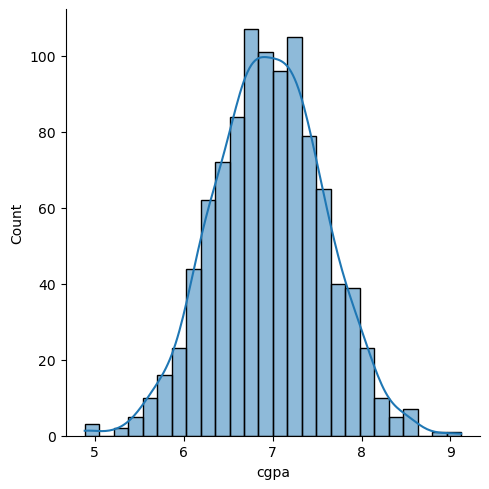

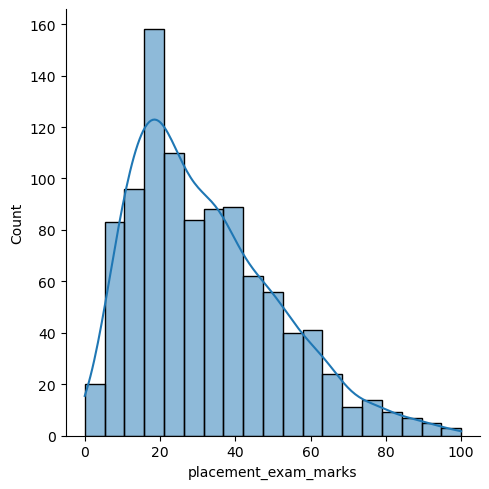

In [11]:
plt.figure(figsize=(12,8))
sns.displot(df["cgpa"],kde=True)

sns.displot(df["placement_exam_marks"],kde=True)
plt.show()

In [13]:
print(df["cgpa"].mean()+3*df["cgpa"].std())
print(df["cgpa"].mean()-3*df["cgpa"].std())


8.808933625397168
5.113546374602832


In [15]:
df[(df["cgpa"]>8.80) | (df["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [16]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()


In [17]:
df["cgpa"]=np.where(
    df["cgpa"]>upper_limit,
    upper_limit,
    np.where(
        df["cgpa"]<lower_limit,
        lower_limit,
        df["cgpa"]
    )
)

In [18]:
df["cgpa"].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64